### Importación de datos



In [257]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [258]:


facturacion_tienda1 = tienda["Precio"].sum()
facturacion_tienda2 = tienda2["Precio"].sum()
facturacion_tienda3 = tienda3["Precio"].sum()
facturacion_tienda4 = tienda4["Precio"].sum()
facturacion_total = facturacion_tienda1 + facturacion_tienda2 + facturacion_tienda3 + facturacion_tienda4
facturacion_total_dic = {
    "Tienda 1": facturacion_tienda1,
    "Tienda 2": facturacion_tienda2,
    "Tienda 3": facturacion_tienda3,
    "Tienda 4": facturacion_tienda4}
print(facturacion_total)
print(facturacion_total_dic)

4403619200.0
{'Tienda 1': np.float64(1150880400.0), 'Tienda 2': np.float64(1116343500.0), 'Tienda 3': np.float64(1098019600.0), 'Tienda 4': np.float64(1038375700.0)}


In [259]:
# 1. Convertimos tu diccionario en un DataFrame
# Usamos .items() para que tome las claves (Tienda) y valores (Dinero) como columnas
df_facturacion = pd.DataFrame(list(facturacion_total_dic.items()), columns=['Nombre Tienda', 'Facturacion'])

# 2. Ordenamos de menor a mayor
# ascending=True es el valor por defecto (solo como anotacion personal para recordar el concepto)
df_ordenado_fact = df_facturacion.sort_values(by='Facturacion', ascending=False)

# 3. Restablecemos el índice (0, 1, 2, 3...)
df_ordenado_fact = df_ordenado_fact.reset_index(drop=True)

# Mostramos el resultado
df_ordenado_fact.style.format({'Facturacion': '{:,.2f}'})


,Nombre Tienda,Facturacion
0,Tienda 1,"1,150,880,400.00"
1,Tienda 2,"1,116,343,500.00"
2,Tienda 3,"1,098,019,600.00"
3,Tienda 4,"1,038,375,700.00"


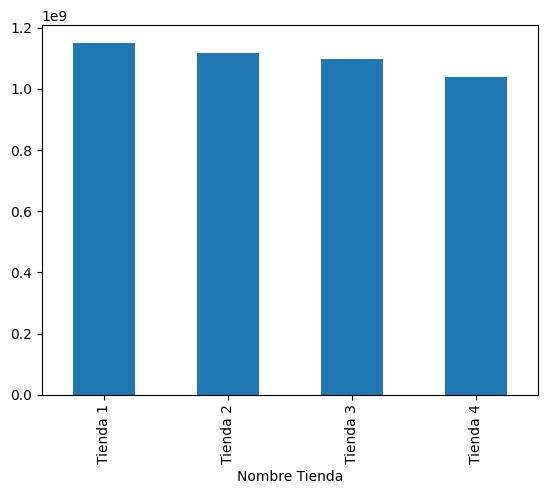

In [260]:
import matplotlib.pyplot as plt
df_ordenado_fact_plot = df_ordenado_fact.plot(kind='bar', x='Nombre Tienda', y='Facturacion', legend=False)

# 2. Ventas por categoría

In [261]:
# Creamos una lista con los 4 dataframes
lista_tiendas = [tienda, tienda2, tienda3, tienda4]

# Los concatenamos (pegamos verticalmente)
df_total_categorias = pd.concat(lista_tiendas)

# Vemos una muestra para asegurar que todo esté bien
df_total_categorias.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


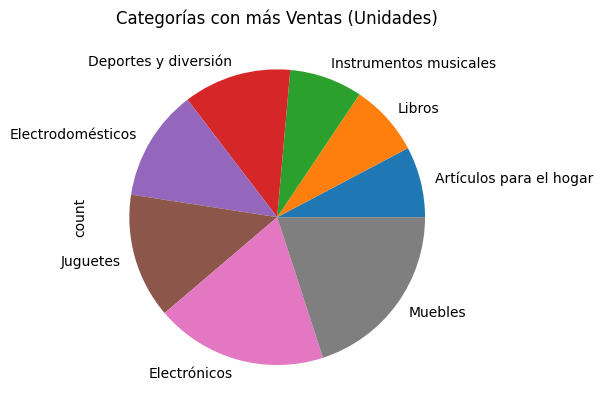

In [262]:
# Analisis de Categorias por Volumen. (Cuál se vende más veces)
# Contamos cuántas filas hay de cada categoría
popularidad_volumen = df_total_categorias['Categoría del Producto'].value_counts().sort_values(ascending=True)
popularidad_volumen

# Lo graficamos rápido para verlo visualmente
popularidad_volumen_plot= popularidad_volumen.plot(kind='pie', color='Orange', title='Categorías con más Ventas (Unidades)')

In [263]:
# Analisis de Categorias por nivel de Facturacion. (Cuál genera más ingresos por ventas)
# Agrupamos por categoría y sumamos el precio
popularidad_dinero = df_total_categorias.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=True)

# Formateamos para ver dinero (opcional si ya configuraste la opción global)
popularidad_dinero

,Precio
Categoría del Producto,
Libros,3.769610e+07
Artículos para el hogar,5.757980e+07
Juguetes,7.360440e+07
Deportes y diversión,1.429777e+08
Instrumentos musicales,3.487726e+08
Muebles,7.576610e+08
Electrodomésticos,1.324751e+09
Electrónicos,1.660576e+09


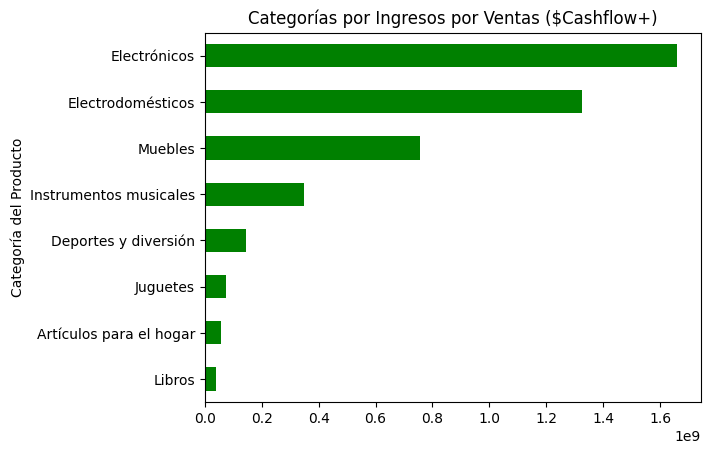

In [264]:
# Visualizacion por grafico de barras horizontales
popularidad_dinero_plot = popularidad_dinero.plot(kind='barh', color='Green', title='Categorías por Ingresos por Ventas ($Cashflow+)')

# 3. Calificación promedio de la tienda


In [265]:
  # Calculamos el promedio de la columna 'Calificación' para cada tienda
calif_t1 = tienda['Calificación'].mean()
calif_t2 = tienda2['Calificación'].mean()
calif_t3 = tienda3['Calificación'].mean()
calif_t4 = tienda4['Calificación'].mean()

# Creamos el diccionario con los resultados
data_calificaciones = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificacion Media': [calif_t1, calif_t2, calif_t3, calif_t4]
}

# Convertimos a DataFrame y ordenamos de la MEJOR a la PEOR
df_calificaciones = pd.DataFrame(data_calificaciones)
df_calificaciones = df_calificaciones.sort_values('Calificacion Media', ascending=False).reset_index(drop=True)

df_calificaciones = df_calificaciones.round(2)

# Mostramos el resultado redondeado
df_calificaciones

,Tienda,Calificacion Media
0,Tienda 3,4.05
1,Tienda 2,4.04
2,Tienda 4,4.00
3,Tienda 1,3.98


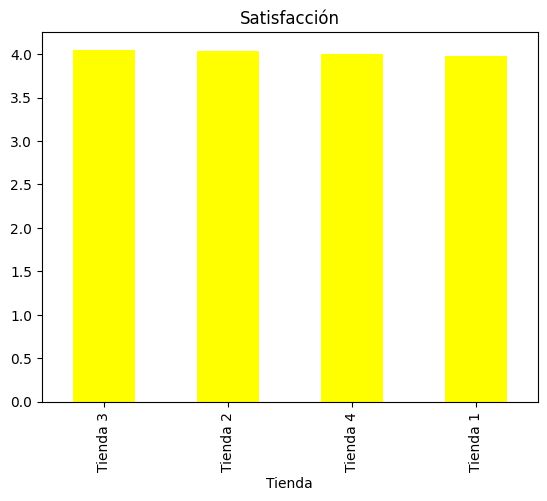

In [266]:
import matplotlib.pyplot as plt

df_satisfacion_plot = df_calificaciones.plot(kind='bar', color= 'yellow' , x='Tienda', y='Calificacion Media', title= 'Satisfacción', legend=False)

# 4. Productos más y menos vendidos

In [267]:
# 1. Guardamos el conteo completo
conteo_productos = df_total_categorias['Producto'].value_counts()

# Buscamos cuál es el número mínimo y maximo de ventas (el mas y menos vendido)
cantidad_minima = conteo_productos.min()
cantidad_maxima = conteo_productos.max()

# Filtramos: cantidad minima y Maxima
los_menos_vendidos = conteo_productos[conteo_productos == cantidad_minima]
los_mas_vendidos = conteo_productos[conteo_productos == cantidad_maxima]

# Mostramos resultados
print(f"Cantidad mínima de ventas: {cantidad_minima}")
print("Lista de productos menos vendidos:")
print(los_menos_vendidos.index.tolist())
print("Lista de productos MAS vendidos:")
print(los_mas_vendidos.index.tolist())

Cantidad mínima de ventas: 157
Lista de productos menos vendidos:
['Celular ABXY']
Lista de productos MAS vendidos:
['Mesa de noche']


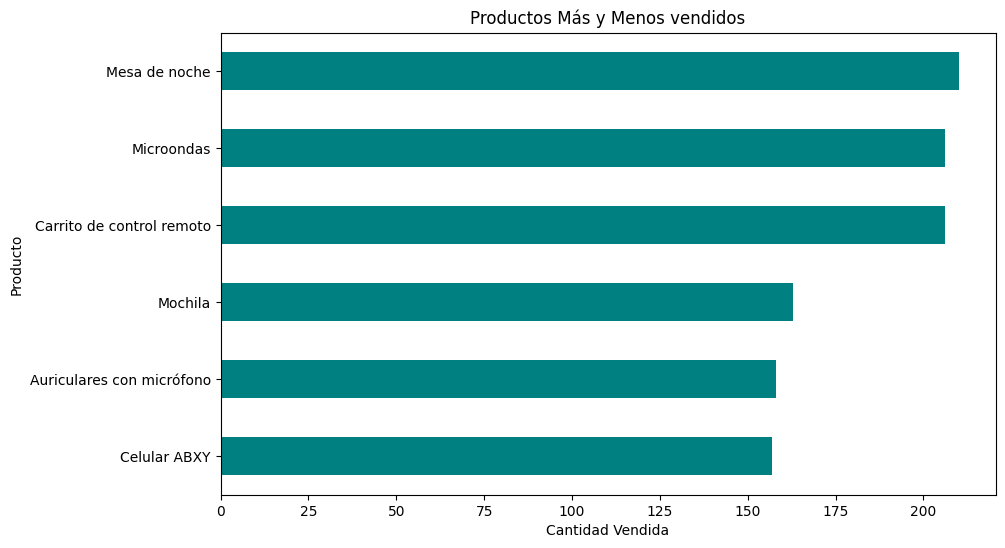

In [268]:
# Unimos los 3 mejores y los 3 peores para la foto
max_y_min = pd.concat([conteo_productos.tail(3), conteo_productos.head(3)])

#se ordenan en el grafico de menor a mayor
max_y_min = max_y_min.sort_values(ascending=True)

#Tipo de grafico, color, proporcion
max_y_min_plot = max_y_min.plot(kind='barh', color='teal', figsize=(10,6))

#Titulos de los Ejes
plt.title('Productos Más y Menos vendidos' )
plt.xlabel('Cantidad Vendida')
plt.show()

# 5. Envío promedio por tienda

In [269]:
# 1. Calculamos el promedio de la columna 'Costo de envío'
envio_t1 = tienda['Costo de envío'].mean()
envio_t2 = tienda2['Costo de envío'].mean()
envio_t3 = tienda3['Costo de envío'].mean()
envio_t4 = tienda4['Costo de envío'].mean()

# 2. Creamos el diccionario
data_envios = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Envío Promedio': [envio_t1, envio_t2, envio_t3, envio_t4]
}

# 3. Convertimos a DataFrame y ordenamos (del MÁS BARATO al más caro)
# Aquí ascending=True porque queremos ver primero el envío más económico (que es mejor)
df_envios = pd.DataFrame(data_envios)
df_envios = df_envios.sort_values('Envío Promedio', ascending=True).reset_index(drop=True)

df_envios.round(2)

,Tienda,Envío Promedio
0,Tienda 4,23459.46
1,Tienda 3,24805.68
2,Tienda 2,25216.24
3,Tienda 1,26018.61


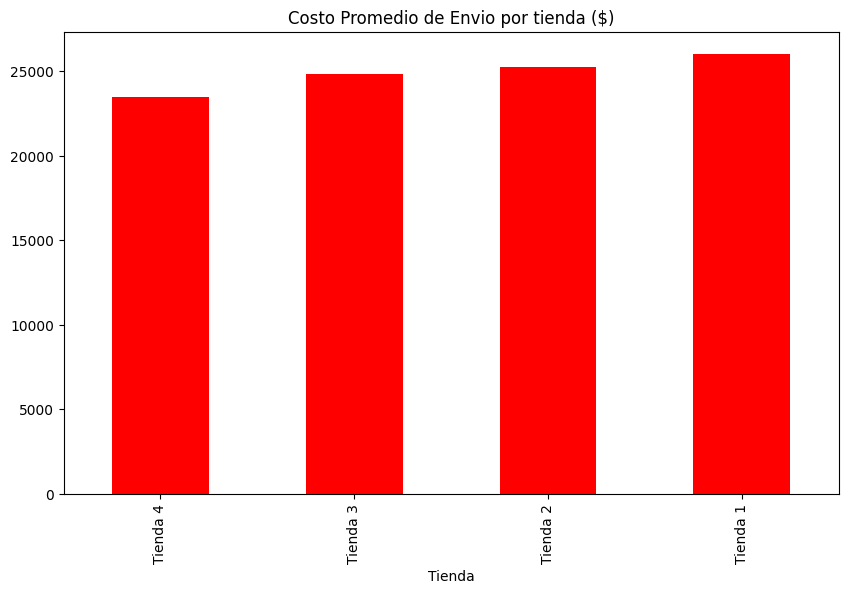

In [270]:
df_envios_media_plot= df_envios.plot(kind='bar', color='red', figsize=(10,6), x='Tienda', title= 'Costo Promedio de Envio por tienda ($)', legend=False)

#VISUALIZACIONES

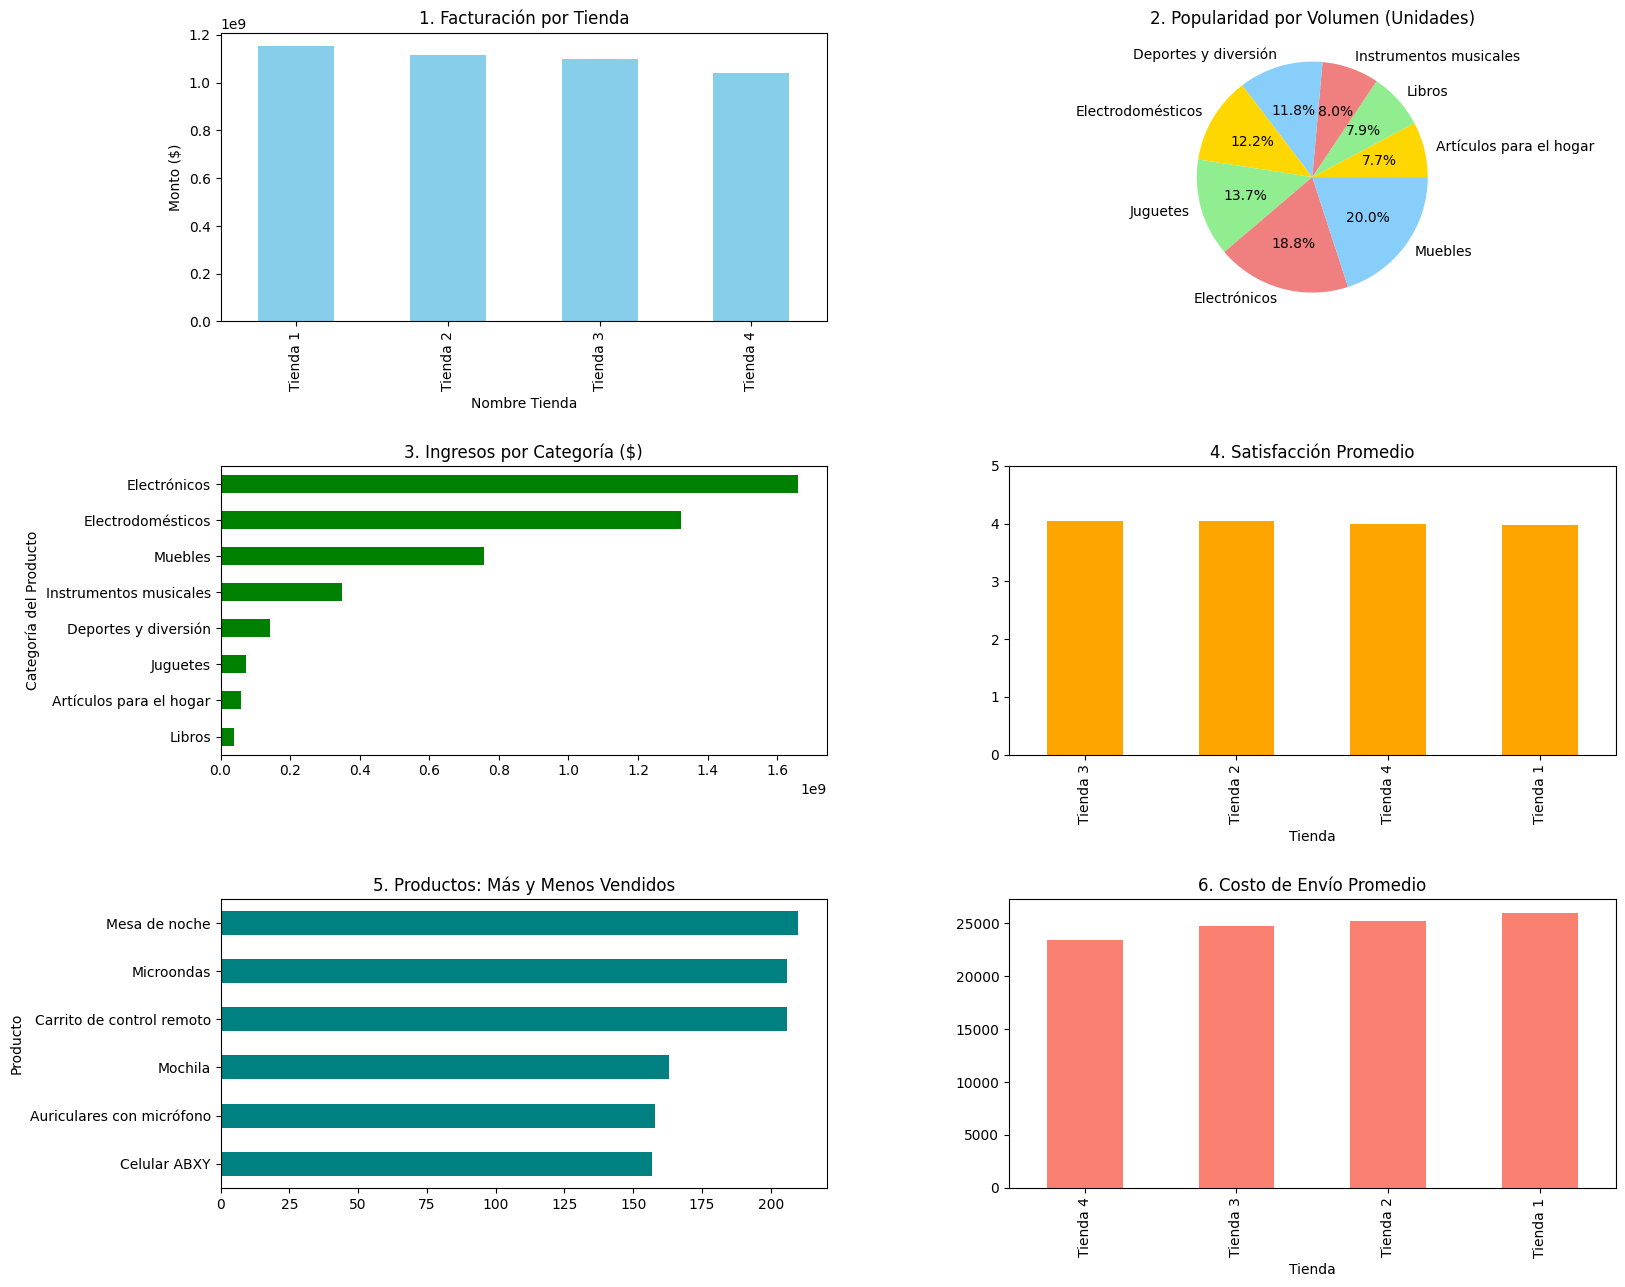

In [271]:
import matplotlib.pyplot as plt

# Configuramos un "Lienzo" gigante para poner todos los gráficos
# 3 filas y 2 columnas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))

# Ajustamos el espacio para que no se amontonen los títulos
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# ---------------------------------------------------------
# 1. Facturación (Barras Verticales) -> Posición [0,0]
# ---------------------------------------------------------
df_ordenado_fact.plot(kind='bar', x='Nombre Tienda', y='Facturacion',
                      ax=axes[0,0], color='skyblue', legend=False)
axes[0,0].set_title('1. Facturación por Tienda')
axes[0,0].set_ylabel('Monto ($)')


# ---------------------------------------------------------
# 2. Popularidad (Pie Chart) -> Posición [0,1]
# ---------------------------------------------------------
popularidad_volumen.plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%',
                         colors=['gold', 'lightgreen', 'lightcoral', 'lightskyblue'])
axes[0,1].set_title('2. Popularidad por Volumen (Unidades)')
axes[0,1].set_ylabel('') # Quitamos la etiqueta fea del eje Y


# ---------------------------------------------------------
# 3. Ingresos por Categoría (Barras Horizontales) -> Posición [1,0]
# ---------------------------------------------------------
popularidad_dinero.plot(kind='barh', ax=axes[1,0], color='green')
axes[1,0].set_title('3. Ingresos por Categoría ($)')


# ---------------------------------------------------------
# 4. Satisfacción (Barras Verticales) -> Posición [1,1]
# ---------------------------------------------------------
df_calificaciones.plot(kind='bar', x='Tienda', y='Calificacion Media',
                       ax=axes[1,1], color='orange', legend=False)
axes[1,1].set_title('4. Satisfacción Promedio')
axes[1,1].set_ylim(0, 5) # Asumiendo escala de 5


# ---------------------------------------------------------
# 5. Productos Top/Bottom (Barras Horizontales) -> Posición [2,0]
# ---------------------------------------------------------
max_y_min.plot(kind='barh', ax=axes[2,0], color='teal')
axes[2,0].set_title('5. Productos: Más y Menos Vendidos')


# ---------------------------------------------------------
# 6. Envíos (Barras Verticales) -> Posición [2,1]
# ---------------------------------------------------------
df_envios.plot(kind='bar', x='Tienda', y='Envío Promedio', # Verifica si tu columna se llama 'Envío Promedio' o 'Envío'
               ax=axes[2,1], color='salmon', legend=False)
axes[2,1].set_title('6. Costo de Envío Promedio')


# ¡Magia! Mostramos todo junto
plt.show()


VEREDICTO FINAL:

Se sugiere la venta de la Tienda 4, dado que su facturación total es la menor de las 4 tiendas. A pesar de tener una ventaja comparativa, respecto a costos logisticos más bajos respecto de las demás, su performance respecto de facturación total es la de peor desempeño.